In [2]:
import numpy as np
import pandas as pd
from numpy import isnan
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from scipy import stats  
from scipy import interp

In [34]:
new_data_sep = pd.read_csv('my_table_patients.csv')
new_data_sep.head()

Sub_ID  pathologic_side pathology_location  age gender  MT_P  MT_H  RMT_P  \
0       1                1                  p   70      f    21    27   44.0   
1       1                1                  p   70      f    21    27   44.0   
2       1                1                  p   70      f    21    27   44.0   
3       1                1                  p   70      f    21    27   44.0   
4       1                1                  p   70      f    21    27   44.0   

   RMT_H Pathology  ...       FAH      ADCP      ADCH       ADP       ADH  \
0   49.0      typ4  ...  0.182935  0.000949  0.001204  0.001426  0.001496   
1   49.0      typ4  ...  0.244885  0.001016  0.001358  0.001412  0.001704   
2   49.0      typ4  ...  0.278130  0.000925  0.001129  0.001328  0.001483   
3   49.0      typ4  ...  0.304703  0.000866  0.001001  0.001277  0.001365   
4   49.0      typ4  ...  0.323740  0.000837  0.000930  0.001257  0.001338   

        RDP       RDH       FDP       FDH  loc  
0  0.000804  0.001048  0.401967  0.259200    0  
1  0.000827  0.001193  0.417148  0.350345    1  
2  0.000756  0.000956  0.442951  0.380934    2  
3  0.000699  0.000833  0.464282  0.410001    3  
4  0.000668  0.000761  0.486495  0.431298    4  

[5 rows x 22 columns]

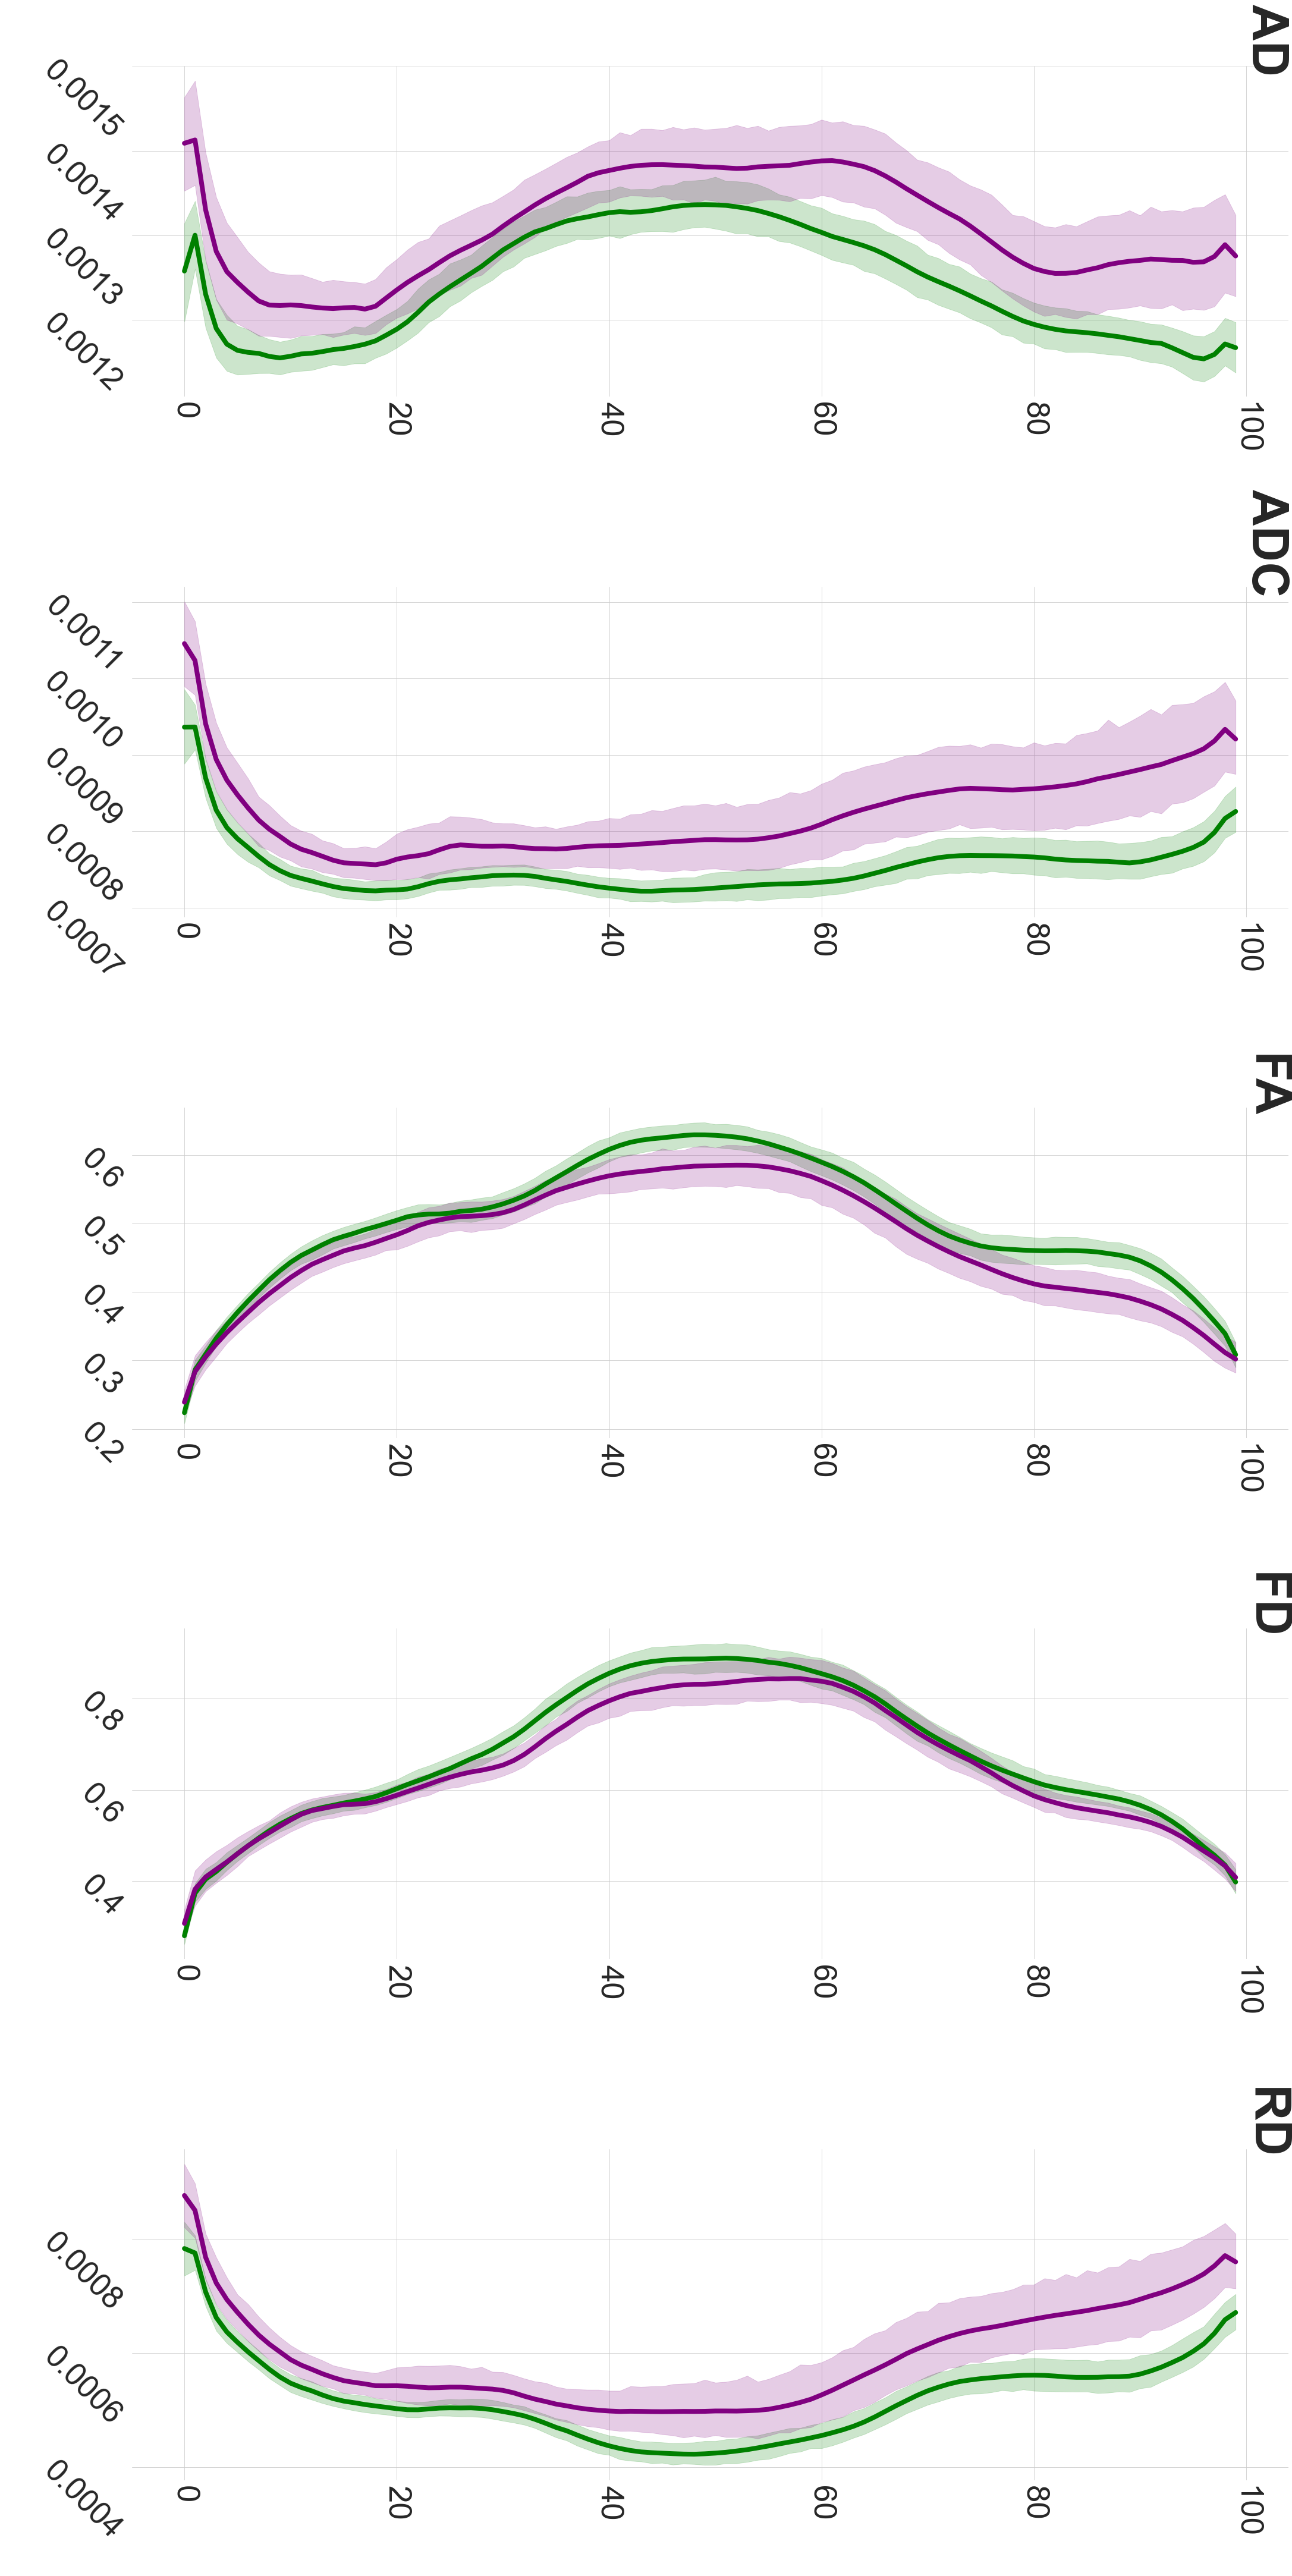

In [35]:
import seaborn as sns
from scipy import stats

metrics = ['ADP','ADCP','FAP','FDP','RDP']
metric_name = ['AD','ADC','FA','FD','RD']
sns.set(style='whitegrid',palette=['green','purple'])
sns.set_context("paper", font_scale=6) 

fig, axes = plt.subplots(5,figsize=(30,60))
for i, met in enumerate(metrics):
    line_p = sns.lineplot(ax = axes[i],x='loc', y=(new_data_sep[met]), hue='motor_status',
                 data=new_data_sep, ci=95, alpha=1, linewidth=8, legend= False)
    axes[i].set_title(metric_name[i],rotation=270, loc = 'right', fontweight='bold', 
                 fontsize=84, pad=0.005)
    axes[i].tick_params(axis='x',labelrotation=270)
    axes[i].tick_params(axis='y',labelrotation=-45)
    axes[i].set_ylabel('   ')  
    axes[i].set_xlabel('   ') 

sns.despine(left=True, bottom=True)
fig.tight_layout(pad=0.005)

In [36]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

gp_new_data_sep = new_data_sep.groupby('motor_status')
pvalues = dict()
statistics = dict() 
for stat_idx, stat in enumerate(metrics):
        #ax[stat_idx, 0].set_ylabel(stat.upper())
        new_data_sep_c0 = new_data_sep[new_data_sep['motor_status'] == 0]
        new_data_sep_c1 = new_data_sep[new_data_sep['motor_status'] == 1]
        tract_als_stat = new_data_sep_c0.pivot(index='loc', columns='Sub_ID', values=stat).T
        tract_ctrl_stat = new_data_sep_c1.pivot(index='loc', columns='Sub_ID', values=stat).T
        statistics[stat], pvalues[stat] = stats.ttest_ind(tract_als_stat, tract_ctrl_stat, equal_var = False)


ADP (array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True]), array([0.01113686, 0.01674461, 0.03015882, 0.03463003, 0.03463003,
       0.02929097, 0.02929097, 0.03171839, 0.02587457, 0.02121149,
       0.02124321, 0.02282886, 0.02282886, 0.02683632, 0.03171839,
       0

<AxesSubplot:>

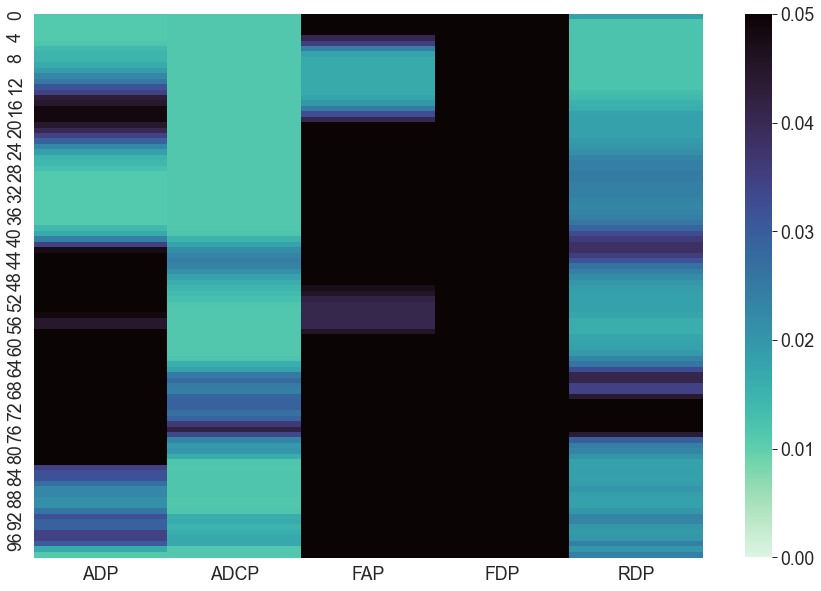

In [37]:
plt.figure(figsize = (15,10))
temp = dict()
b = dict()

for stat_idx, stat in enumerate(metrics):
    
    print(stat,multipletests(pvalues[stat], alpha=0.05, method='fdr_bh', 
                             is_sorted=False, returnsorted=False))
    _,b[stat],_,_ = multipletests(pvalues[stat], alpha=0.05, method='fdr_bh', 
                                        is_sorted=False, returnsorted=False)
    temp[stat] = np.flip(b[stat])

sns.set_context("paper", font_scale=2)
df = pd.DataFrame(temp)
sns.heatmap(df, annot=False, fmt="g",vmin=0, vmax=0.05, cmap='mako_r')



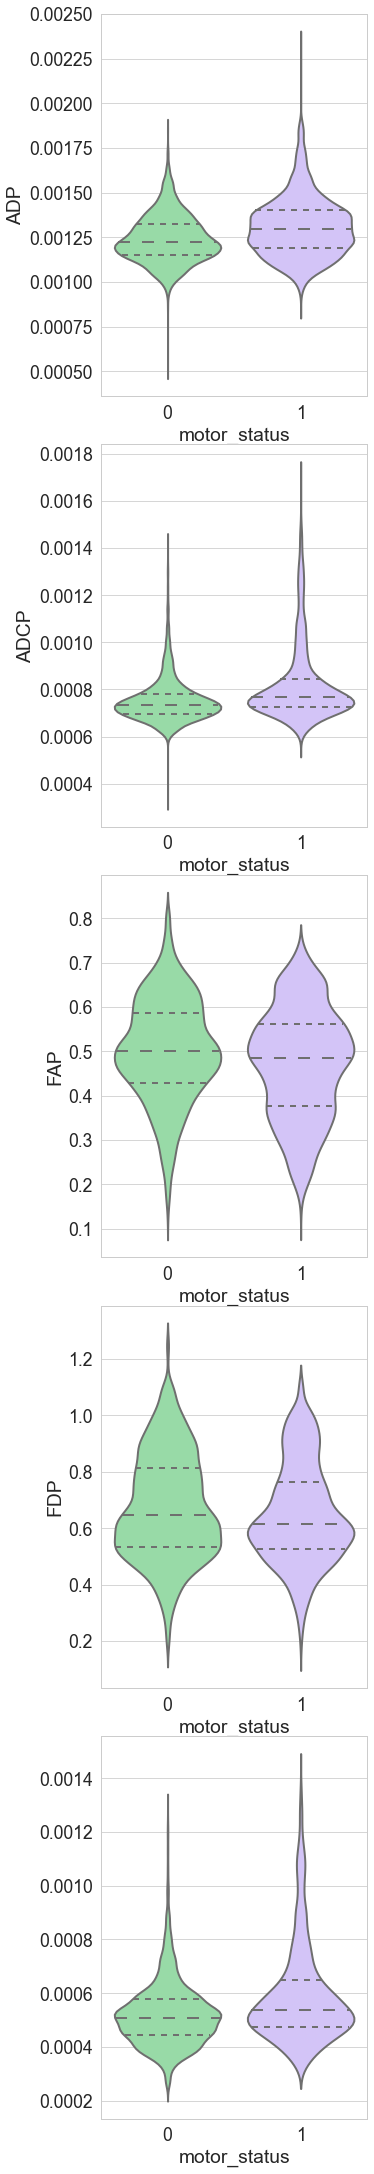

In [38]:
sns.set()
metric_name = ['AD','ADC','FA','FD','RD']

sns.set(style='whitegrid', palette = ["#8DE5A1","#D0BBFF"])
sns.set_context("paper", font_scale=2) # context='talk'
fig, axes = plt.subplots(5,1,figsize=(5,30))
for stat_idx, stat in enumerate(metrics):
    sns.violinplot(ax=axes[stat_idx], x='motor_status', y=new_data_sep[stat], linewidth=2, data=new_data_sep, fliersize = 4, 
                    ci =95 , inner="quartile",split=True, scale='width')
    axes[i].set_ylabel('   ')  
    #axes[i].set_xlabel('   ') 
    #axes[i].set_title(metric_name[i], fontweight='bold', fontsize=84, pad=0.05)
fig.tight_layout(pad=0.0005)

In [78]:
stats_df = pd.read_csv('my_table_patients_stats_measure.csv') 
stats_df.head()

metrics      Mean  Standard_deviation  Kurtosis  Skewness     MeanH  \
0      AD  0.001378            0.000110 -1.414401 -0.092683  0.001306   
1      AD  0.001338            0.000111  2.295440  1.391494  0.001258   
2      AD  0.001289            0.000083 -0.755139  0.025863  0.001234   
3      AD  0.001244            0.000128  4.899379  1.731534  0.001242   
4      AD  0.001251            0.000135  0.261340  0.070395  0.001278   

       STDH  KurtosisH  SkewnessH  motor_status  Sub_ID  
0  0.000091   2.230042   0.558798             0       1  
1  0.000124  -0.627744   0.413015             1       2  
2  0.000130  -0.920538  -0.006064             1       3  
3  0.000128   5.284320   1.804351             0       4  
4  0.000117  -0.745850  -0.064549             0       5

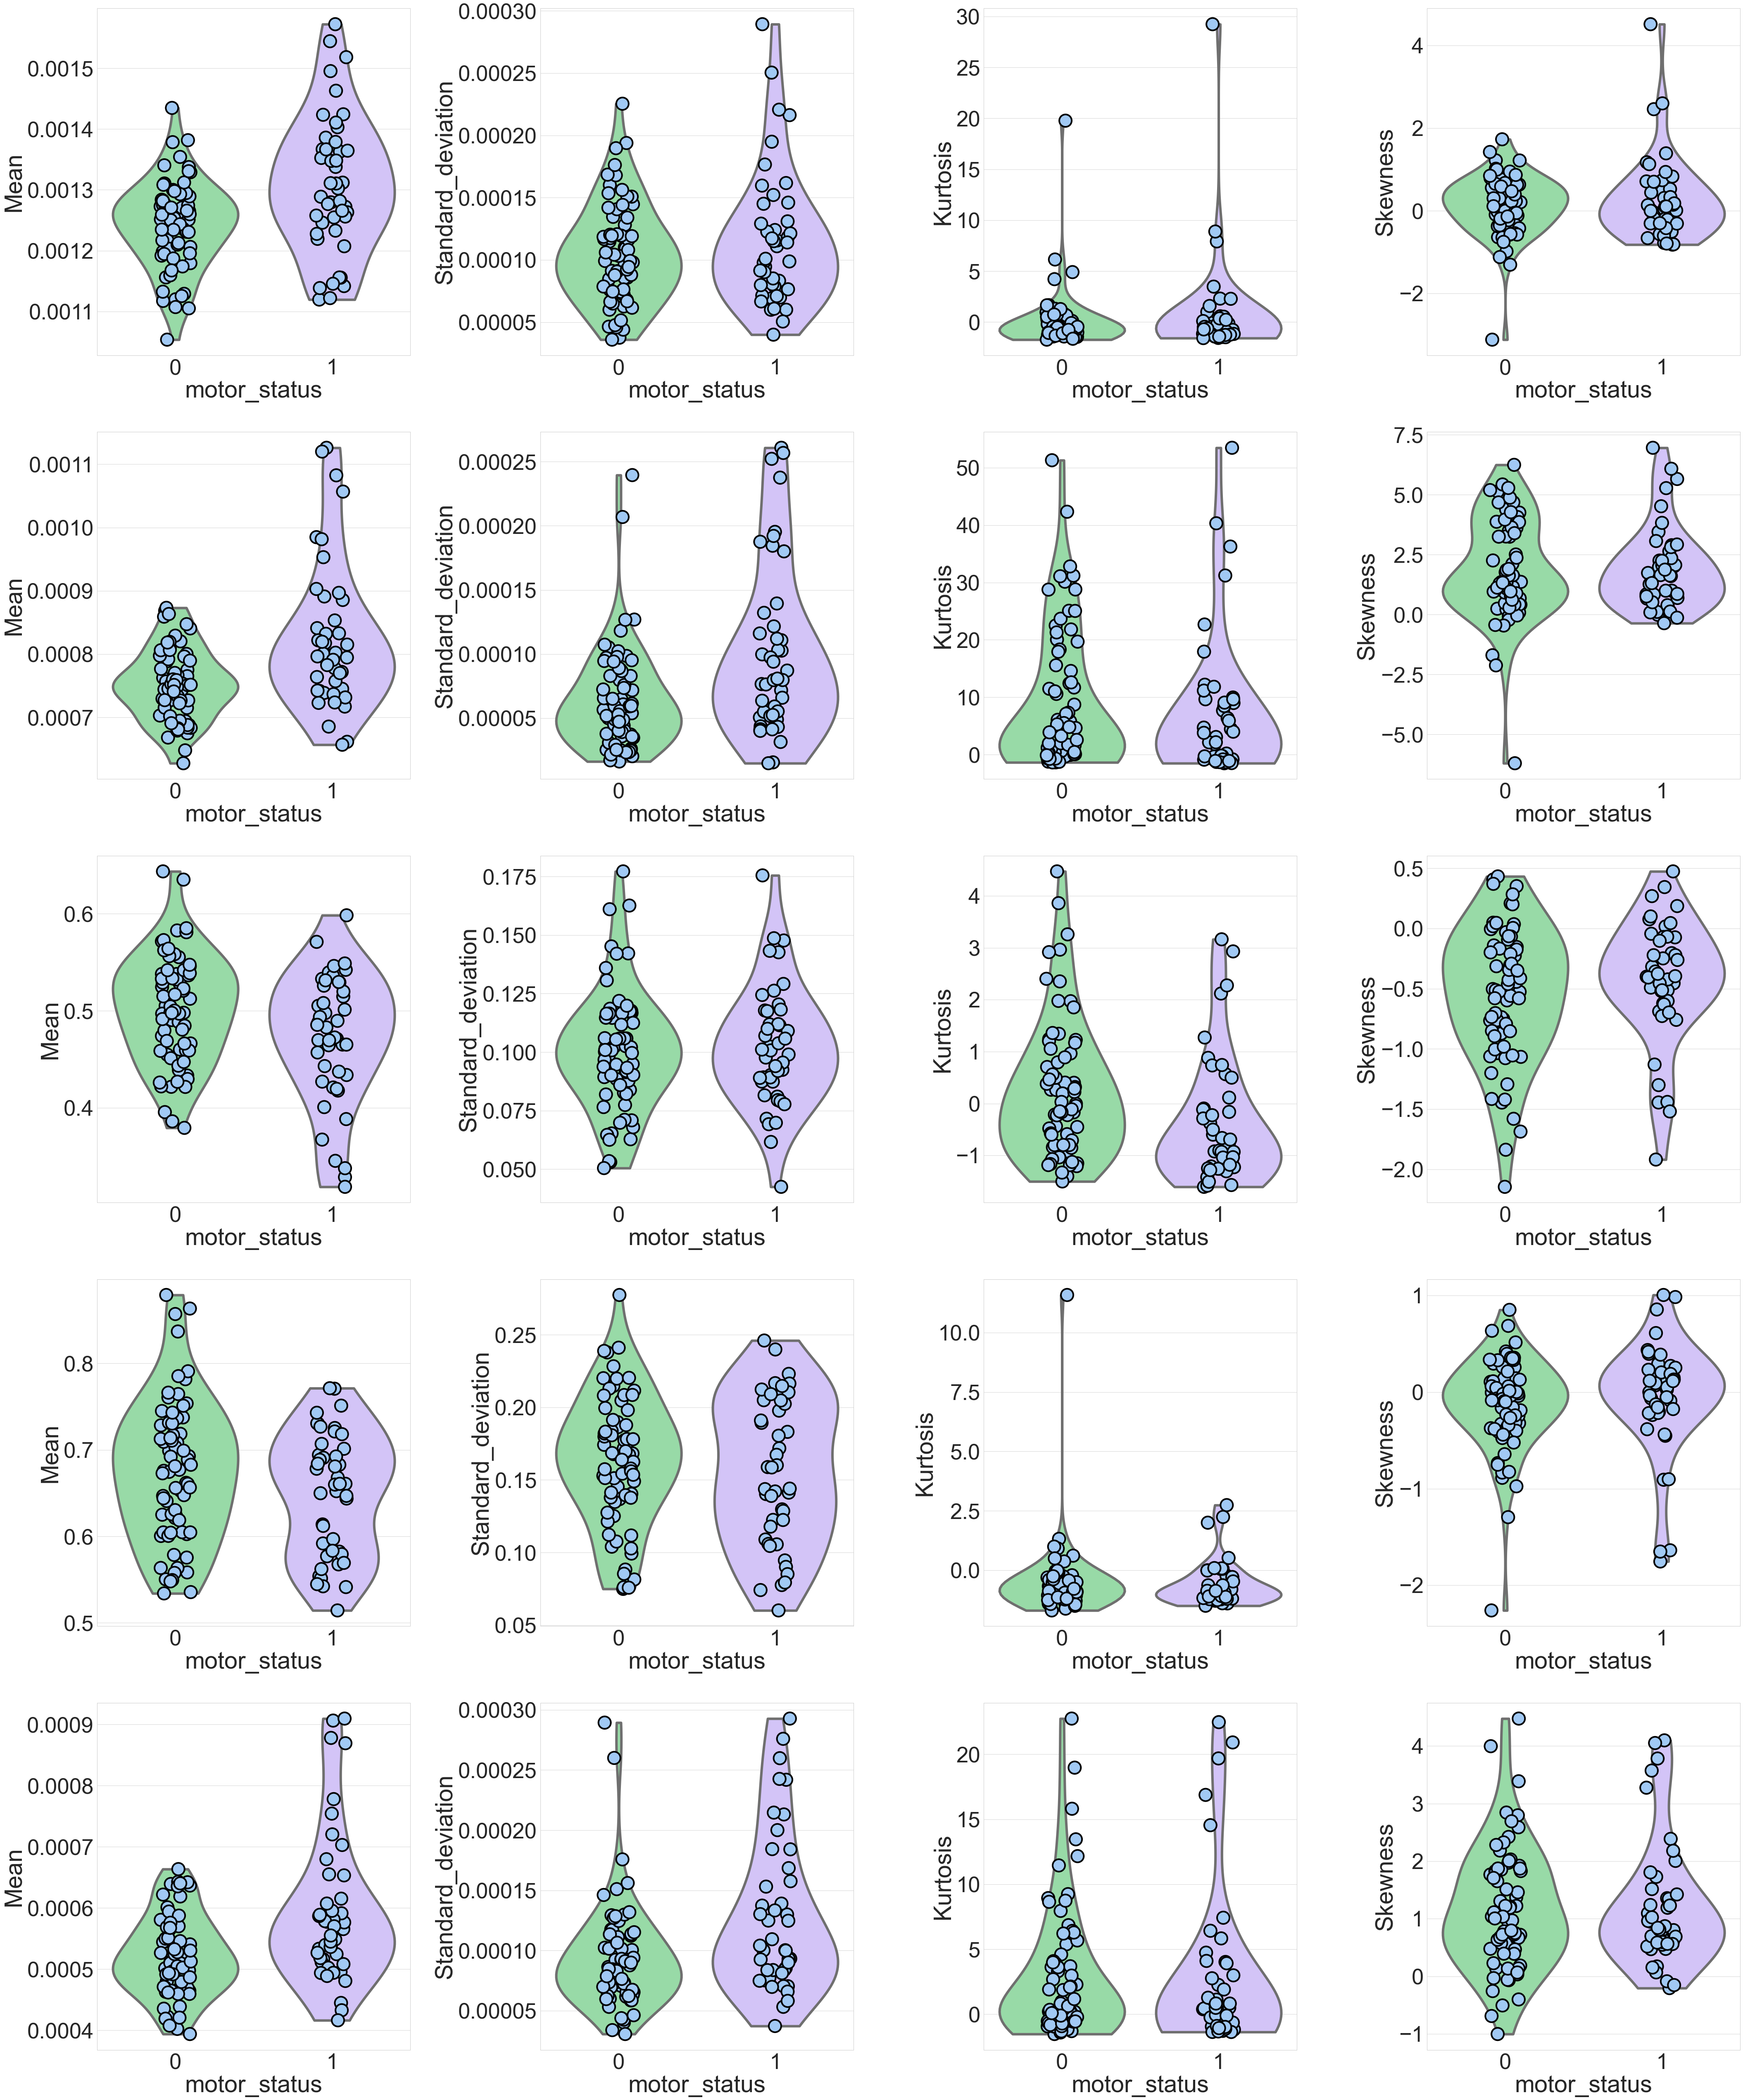

In [79]:
import random
tmp = []
sns.set()
random.seed(123)
sns.set(style='whitegrid') #, palette = ["#8DE5A1","#D0BBFF"]
sns.set_context("paper", font_scale=6) # context='talk'
fig, axes = plt.subplots(5,4,figsize=(60,72)) # figsize=(30,36)
for i, met in enumerate(['AD', 'ADC', 'FA', 'FD', 'RD']):
    for j, stat in enumerate(['Mean','Standard_deviation','Kurtosis','Skewness']):
        
        sns.violinplot(ax = axes[i,j], x='motor_status', y=stat, data=stats_df[stats_df['metrics']==met], 
                       fliersize = 9, scale='width', inner=None, linewidth=6, palette=["#8DE5A1","#D0BBFF"],cut=0, jitter=True)
        
        sns.stripplot(ax = axes[i,j],x='motor_status', y=stat, jitter=True, data=stats_df[stats_df['metrics']==met], 
                       linewidth=4, size=30, edgecolor="black", palette=["#A1C9F4"])
        
fig.tight_layout(pad=1)


In [17]:

save_df = pd.DataFrame(columns=['metrics','Mean_ipsilesional','Standard_deviation_ipsilesional',
                                    'Kurtosis_ipsilesional','Skewness_ipsilesional','Mean_contralesional',
                                        'STD_contralesional','Kurtosis_contralesional','Skewness_contralesional','test'])

for i, met in enumerate(['AD', 'ADC', 'FA', 'FD', 'RD']):
    for j, stat in enumerate(['Mean','Standard_deviation','Kurtosis','Skewness']):
        df = stats_df[stats_df['metrics']==met]
        static, pvalue = stats.mannwhitneyu(df[df['motor_status']==0].loc[:,stat],df[df['motor_status']==1].loc[:,stat])
        print(met,'(',stat,'):\n','static:',static,', pvalue:', pvalue)
        save_df['metrics'] = met
        save_df['metrics',j] = pvalue
        save_df.loc['test'] = stat
        

AD ( Mean ):
 static: 1000.0 , pvalue: 0.00035915874512317827
AD ( Standard_deviation ):
 static: 1469.0 , pvalue: 0.2341572786697913
AD ( Kurtosis ):
 static: 1537.0 , pvalue: 0.366947543185421
AD ( Skewness ):
 static: 1536.0 , pvalue: 0.36481618144418837
ADC ( Mean ):
 static: 974.0 , pvalue: 0.00020793562410994644
ADC ( Standard_deviation ):
 static: 1032.0 , pvalue: 0.0006843192729760747
ADC ( Kurtosis ):
 static: 1329.0 , pvalue: 0.06445201298720575
ADC ( Skewness ):
 static: 1547.0 , pvalue: 0.38847701594380935
FA ( Mean ):
 static: 1214.0 , pvalue: 0.015003176742231243
FA ( Standard_deviation ):
 static: 1528.0 , pvalue: 0.347920379642365
FA ( Kurtosis ):
 static: 1034.0 , pvalue: 0.0007117261438705842
FA ( Skewness ):
 static: 1413.0 , pvalue: 0.1485877267971279
FD ( Mean ):
 static: 1339.0 , pvalue: 0.07190077569372236
FD ( Standard_deviation ):
 static: 1477.0 , pvalue: 0.2482846512862143
FD ( Kurtosis ):
 static: 1536.0 , pvalue: 0.36481618144418837
FD ( Skewness ):
 static

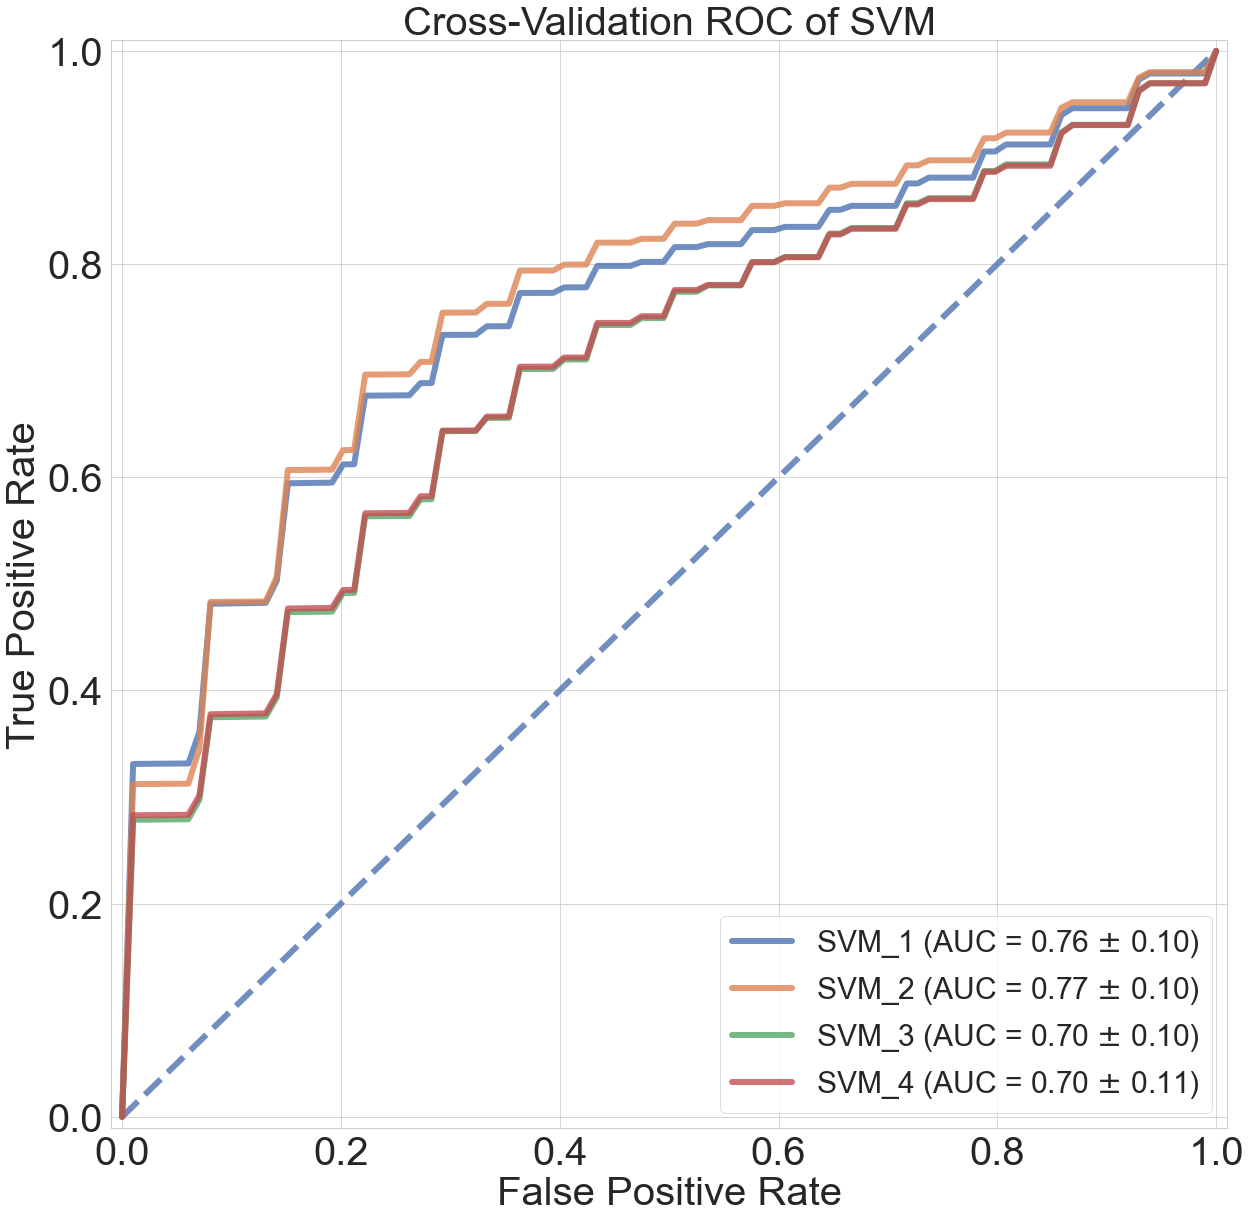

In [18]:
from numpy import savetxt, loadtxt
import matplotlib.pyplot as plt

# according to the SVM model in the manuscript SVM1-4 are based on median profile
# add also SVM_5

list_tpr = ['mean_tpr_Mdn_MdnImp','mean_tpr_Mdn_knn20Imp','mean_tpr_M_MdnImp','mean_tpr_M_knn20Imp','mean_tpr_demo']
list_fpr = ['mean_fpr_Mdn_MdnImp','mean_fpr_Mdn_knn20Imp','mean_fpr_M_MdnImp','mean_fpr_M_knn20Imp','mean_fpr_demo']
list_auc = ['mean_auc_Mdn_MdnImp','mean_auc_Mdn_knn20Imp','mean_auc_M_MdnImp','mean_auc_M_knn20Imp','mean_auc_demo']
list_std = ['std_Mdn_MdnImp','std_Mdn_knn20Imp', 'std_M_MdnImp','std_M_knn20Imp','std_demo']
legend_ = ['SVM_1','SVM_2','SVM_3','SVM_4', 'SVM_6'] 

plt.figure(figsize=(20,20))
plt.plot([0,1],[0,1],linestyle = '--',lw = 6,color = 'b',alpha=0.8)

for i in range(4):
    mean_tpr = loadtxt('/Users/boshra/Desktop/Boshra/'+list_tpr[i]+'.csv', delimiter=',')
    mean_fpr = loadtxt('/Users/boshra/Desktop/Boshra/'+list_fpr[i]+'.csv', delimiter=',')
    mean_auc = loadtxt('/Users/boshra/Desktop/Boshra/'+list_auc[i]+'.csv', delimiter=',')
    std = loadtxt('/Users/boshra/Desktop/Boshra/'+list_std[i]+'.csv', delimiter=',')
    
    plt.plot(mean_fpr, mean_tpr,
            label= legend_[i]+r' (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std),lw=6, alpha=0.8)


#std_tpr = np.std(tprs, axis=0)
plt.xlabel('False Positive Rate',fontsize = 40)
plt.ylabel('True Positive Rate',fontsize = 40)
plt.title('Cross-Validation ROC of SVM',fontsize = 40)
plt.legend(loc="lower right", prop={'size': 30})
plt.xlim([-0.01, 1.01]) 
plt.ylim([-0.01, 1.01]) 

plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 4
plt.show()